In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Import Data

In [2]:
ptsd_pre = pd.read_csv('../../data/ptsd_pre_features_tfidf_256.csv')
ptsd_post = pd.read_csv('../../data/ptsd_post_features_tfidf_256.csv')

In [3]:
ptsd_pre.head(3)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,ptsd,dyingly,2019/04/10,feeling lost and confused after reporting abus...,0.092269,2.320834,2.053768,90.505275,101.919708,5.203041,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,ptsd,huntressbathory,2019/04/10,Question about dealing with PTSD after SA.. an...,4.264834,6.199148,4.020033,88.123140,71.906977,6.774751,...,0.289452,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,ptsd,TooManyHappy,2019/04/10,Advice on family members who are triggers Incr...,11.181846,7.870123,11.001387,61.495053,58.557740,14.106204,...,0.000000,0.0,0.0,0.0,0.0,0.090781,0.126561,0.0,0.0,0.057365


In [4]:
ptsd_pre.tail(3)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
4480,ptsd,twelveblueoranges,2018/11/26,Dissociating I’ve been struggling lately with ...,4.317593,5.781226,5.396343,80.195824,70.962617,8.340654,...,0.0,0.0,0.206773,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4481,ptsd,nosebros,2018/11/26,Help Tonight was the first night I have done “...,0.057890,2.319457,2.281905,93.088352,89.095238,6.278388,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4482,ptsd,uncreative_connor,2018/11/26,"""Hole in your chest"" feeling? Its been 8 month...",1.465371,3.969370,2.730714,90.829670,84.357143,6.660440,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Features

1. The published paper, from which the dataset is cited, has an in depth breakdown of the features which can be found here: [https://www.jmir.org/2020/10/e22635/](https://www.jmir.org/2020/10/e22635/).  

2. The question we are asking is:  How has the substance use increased over the pandemic?
  
- Feature of interest: `substance_use_total`
  
- In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

## High level analysis

The question we are asking is *How has the substance use increased over the pandemic?*. 
For this project we have selected _one_ feature of interest: `substance_use_total`. In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

In [5]:
columns_of_interest = ['subreddit', 'author', 'date', 'post', 'substance_use_total']

ptsd_pre = ptsd_pre.loc[:, columns_of_interest]
ptsd_post = ptsd_post.loc[:, columns_of_interest]

In [6]:
ptsd_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,ptsd,dyingly,2019/04/10,feeling lost and confused after reporting abus...,0
1,ptsd,huntressbathory,2019/04/10,Question about dealing with PTSD after SA.. an...,0
2,ptsd,TooManyHappy,2019/04/10,Advice on family members who are triggers Incr...,1
3,ptsd,AbsurdPigment,2019/04/10,Volunteering is helping Hello everyone. I foun...,3
4,ptsd,Natz35454,2019/04/10,Struggling while therapy is on pause I have be...,0


In [7]:
ptsd_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4483 entries, 0 to 4482
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            4483 non-null   object
 1   author               4483 non-null   object
 2   date                 4483 non-null   object
 3   post                 4483 non-null   object
 4   substance_use_total  4483 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 175.2+ KB


In [8]:
ptsd_post.head(5)

,subreddit,author,date,post,substance_use_total
0,ptsd,mvtaphor,2020/01/01,Just got diagnosed I ended my 2019 crying in a...,1
1,ptsd,peanutbutthurtjelly,2020/01/01,I hate who I am now I was nice. I was kind. I ...,0
2,ptsd,demiurgeshadow,2020/01/01,Anger control. Ill spare my personal testimony...,1
3,ptsd,polkadotcroc,2020/01/01,"Door slamming and other ""angry"" noises A few w...",0
4,ptsd,JohnnyTheLad,2020/01/01,Hey First of all you're all weak. PTSD is a j...,0


In [9]:
ptsd_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            2059 non-null   object
 1   author               2059 non-null   object
 2   date                 2059 non-null   object
 3   post                 2059 non-null   object
 4   substance_use_total  2059 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.6+ KB


### Composition

> There are no missing values from the dataset.

In [10]:
print(f'Total number of records in the pre-pandemic dataset: {len(ptsd_pre)}')
ptsd_pre.describe()

Total number of records in the pre-pandemic dataset: 4483


,substance_use_total
count,4483.000000
mean,0.506357
std,1.009169
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,13.000000


In [11]:
print(f'Total number of records in the post-pandemic dataset: {len(ptsd_post)}')
ptsd_post.describe()

Total number of records in the post-pandemic dataset: 2059


,substance_use_total
count,2059.000000
mean,0.512385
std,1.050807
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,11.000000


Combining the pre and post into one dataset with a new feature column allows us to compare the data side by side

In [12]:
ptsd_pre['period'] = 'pre'
ptsd_post['period'] = 'post'

ptsd_df = pd.concat([ptsd_post, ptsd_pre])
ptsd_df

,subreddit,author,date,post,substance_use_total,period
0,ptsd,mvtaphor,2020/01/01,Just got diagnosed I ended my 2019 crying in a...,1,post
1,ptsd,peanutbutthurtjelly,2020/01/01,I hate who I am now I was nice. I was kind. I ...,0,post
2,ptsd,demiurgeshadow,2020/01/01,Anger control. Ill spare my personal testimony...,1,post
3,ptsd,polkadotcroc,2020/01/01,"Door slamming and other ""angry"" noises A few w...",0,post
4,ptsd,JohnnyTheLad,2020/01/01,Hey First of all you're all weak. PTSD is a j...,0,post
...,...,...,...,...,...,...
4478,ptsd,Euphoric_Substance,2018/11/26,Sleep problems after ASD I've had a bad drug e...,1,pre
4479,ptsd,MJStead,2018/11/26,I feel lost... what next? I’ve been doing ther...,0,pre
4480,ptsd,twelveblueoranges,2018/11/26,Dissociating I’ve been struggling lately with ...,2,pre
4481,ptsd,nosebros,2018/11/26,Help Tonight was the first night I have done “...,0,pre


### Visualization

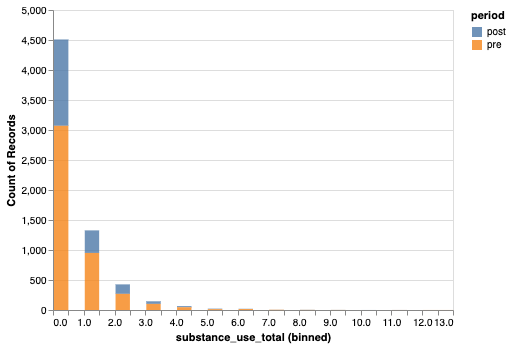

In [13]:
alt.Chart(ptsd_df).mark_bar(opacity=0.8).encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='period'
)

In [14]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(ptsd_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(ptsd_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 4483
Number of unique authors (posters) in 'post' dataset: 2059


**From above figures, it can be summarized that:**

1. Each observation in each dataset is associated with a unique reddit user.
2. There are less unique authors posting in this subreddit post pandemic. It is likely because the `post` dataset covers a 4-month period while the `pre` data set covers a whole year period. 
3. The `substance_use_total` `post` pandemic is higher as shown in the plot. 